# Visualizing The Data

The class label of the first example: [5]


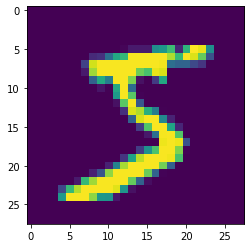

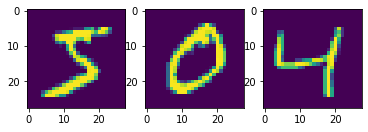

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
mnist_digits = np.load('MNIST_Digits_dataset.npz')
digits_train = mnist_digits['digits_train']
labels_train = mnist_digits['labels_train']

# Display an image of a digit
plt.figure()
plt.imshow(digits_train[0,:,:]) # first example in the training dataset
#plt.savefig('digit.png')

# Print the class of the first example
print('The class label of the first example:', labels_train[0])

# Plot multiple images (1 by 3)
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(digits_train[0,:,:])
ax[1].imshow(digits_train[1,:,:])
ax[2].imshow(digits_train[2,:,:])
#plt.savefig('many_digit.png')

# 8 Nearest Neighbors for First 5 Test Digits

In [7]:
q1_digits = np.load('MNIST_Digits_dataset.npz')
digits_train = q1_digits['digits_train']
labels_train = q1_digits['labels_train']
digits_test = q1_digits['digits_test']
labels_test = q1_digits['labels_test']

print("digits_train shape: ",digits_train.shape)
print("labels_train shape: ",labels_train.shape)
print("digits_test shape: ",digits_test.shape)
print("labels_test shape: ",labels_test.shape)

digits_train shape:  (1000, 28, 28)
labels_train shape:  (1000, 1)
digits_test shape:  (1000, 28, 28)
labels_test shape:  (1000, 1)


In [8]:
digits_train = digits_train.reshape((1000,28*28))
print(digits_train.shape)
digits_test = digits_test.reshape((1000,28*28))
print(digits_test.shape)

(1000, 784)
(1000, 784)


In [9]:
class k_nearest_neighbour:
    def __init__(self,digits_train,labels_train,digits_test):
        self.digits_train = digits_train
        self.labels_train = labels_train
        self.digits_test = digits_test
    
    #returns index of k nearest neighbours according to error array
    def k_NN(self, error, k):
        index = np.argpartition(error,k)
        index = index[0:k].reshape((1,k))
        return index
    
    #returns train labels of nearest indices
    def nearest_class_labels(self,index):
        pred_label = np.zeros((index.shape))
        for i in range(len(index)):
            pred_label[[i]] = np.transpose(self.labels_train[index[i]])
        return pred_label
    
    #prints the test image and its k nearest neighbor images
    def print_images(self,index, num, k):
        self.digits_train = self.digits_train.reshape((1000,28,28))
        self.digits_test = self.digits_test.reshape((1000,28,28))
        for i in range(num):
            plt.figure()
            plt.imshow(self.digits_test[i,:,:])
            
            fig, ax = plt.subplots(nrows=1, ncols=k)
            for j in range(k):
                ax[j].imshow(self.digits_train[index[i,j],:,:])
        pass
    
    def main_funct(self,num=5, k=8):
        index = np.empty((0,k), int)
        
        for i in range(num):
            error=[]
            for j in range(len(self.digits_train)):
                err = np.sqrt(np.sum(np.square(self.digits_test[i,:] - self.digits_train[j,:])))
                error = np.append(error,err)
                
            index= np.append(index, self.k_NN(error,k), axis=0)
            
        print("Indices of 8 nearest neighbors: \n",index)
        print("Nearest_class_labels:\n",self.nearest_class_labels(index))
        self.print_images(index,5,8)
        pass

In [10]:
model = k_nearest_neighbour(digits_train,labels_train,digits_test)

Indices of 8 nearest neighbors: 
 [[542 210 320 690 836 192 952  81]
 [753 723  71  15 193 981 911  79]
 [638   8 484 454 398 678 112 310]
 [587 593 951 961 637 475 993 919]
 [604  26 412 900 576 354 718 304]]
Nearest_class_labels:
 [[0. 0. 0. 5. 5. 0. 0. 0.]
 [7. 7. 7. 7. 7. 7. 7. 7.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 4. 4. 9. 4. 4. 4. 9.]]


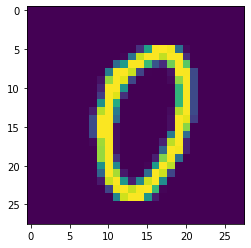

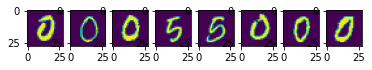

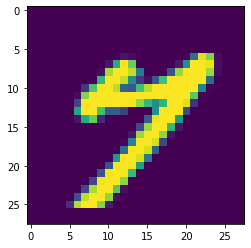

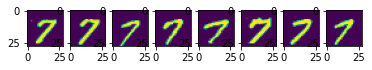

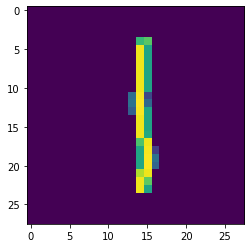

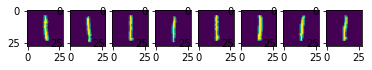

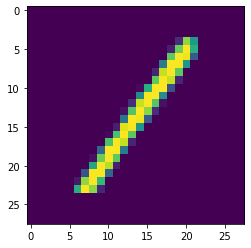

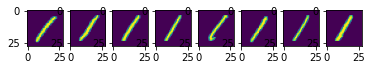

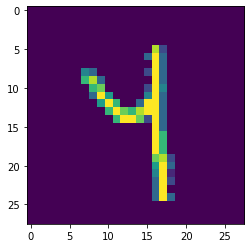

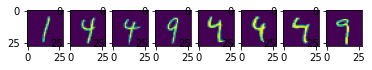

In [11]:
model.main_funct()

# Classifying all Test Images into 10 Classes


In [13]:
class k_nearest_neighbour:
    def __init__(self,digits_train,labels_train,digits_test,labels_test):
        self.digits_train = digits_train
        self.labels_train = labels_train
        self.digits_test = digits_test
        self.labels_test = labels_test
    
    #returns index of k nearest neighbours according to error array
    def k_NN(self, error, k):
        idx = np.argpartition(error,k)
        idx = idx[0:k].reshape((1,k))
        return idx
    
    #returns train labels of nearest indices
    def nearest_class_labels(self,index):
        pred_label = np.zeros((index.shape))
        for i in range(len(index)):
            pred_label[[i]] = np.transpose(self.labels_train[index[i]])
        return pred_label
    
    #returns predicted class labels according to the maximum frequency
    def pred_class_label(self,class_labels):
        ind = class_labels
        ind = ind.astype(int)
        pred_class = []
        for i in range(len(ind)):
            counts = np.bincount(ind[i])
            pred_class = np.append(pred_class,np.argmax(counts))
        return pred_class
    
    #percentage of how many samples were correctly classifiesd
    def classification_accuracy(self,predicted,actual):
        predicted = (predicted.astype(int)).reshape((len(predicted),1))
        actual = actual.astype(int)
        same = np.sum(predicted == actual)
        accuracy = same/len(actual)*100
        
        print("Correctly predicted", same ,"out of ", len(actual) ,"samples.")
        return accuracy

    def main_funct(self,num=5, k=8):
        self.index = np.empty((0,k), int)
        
        for i in range(num):
            error=[]
            for j in range(len(self.digits_train)):
                err = np.sqrt(np.sum(np.square(self.digits_test[i,:] - self.digits_train[j,:])))
                error = np.append(error,err)
                
            self.index= np.append(self.index, self.k_NN(error,k), axis=0)

        pred = (self.pred_class_label(self.nearest_class_labels(self.index))).astype(int)
        accuracy = self.classification_accuracy(pred, self.labels_test) 
        return accuracy
    
    

       

In [14]:
model = k_nearest_neighbour(digits_train,labels_train,digits_test,labels_test)

In [15]:
accuracy = model.main_funct(1000,10)
print("Accuracy =",accuracy)

Correctly predicted 857 out of  1000 samples.
Accuracy = 85.7


# Effect of Different K in KNN


In [ ]:
acc = [0]
for i in range(1,11):
    accuracy = model.main_funct(1000,i)
    print("For k =",i,"\nAccuracy:",accuracy)
    acc = np.append(acc, accuracy)


Correctly predicted 883 out of  1000 samples.
For k = 1 
Accuracy: 88.3
Correctly predicted 850 out of  1000 samples.
For k = 2 
Accuracy: 85.0
Correctly predicted 865 out of  1000 samples.
For k = 3 
Accuracy: 86.5
Correctly predicted 866 out of  1000 samples.
For k = 4 
Accuracy: 86.6
Correctly predicted 857 out of  1000 samples.
For k = 5 
Accuracy: 85.7
Correctly predicted 857 out of  1000 samples.
For k = 6 
Accuracy: 85.7
Correctly predicted 853 out of  1000 samples.
For k = 7 
Accuracy: 85.3


In [ ]:
x_axis = range(1,11)
plt.plot(x_axis,acc[1:11],color="Blue")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Implenting KNN using Different Distance Functions


In [87]:
class k_nearest_neighbour:
    def __init__(self,digits_train,labels_train,digits_test,labels_test):
        self.digits_train = digits_train
        self.labels_train = labels_train
        self.digits_test = digits_test
        self.labels_test = labels_test
    
    #returns index of k nearest neighbours according to error array
    def k_NN(self, dist, k):
        idx = np.argpartition(dist,k)
        idx = idx[0:k].reshape((1,k))
        return idx
    
    #returns train labels of nearest indices
    def nearest_class_labels(self,index):
        pred_label = np.zeros((index.shape))
        for i in range(len(index)):
            pred_label[[i]] = np.transpose(self.labels_train[index[i]])
        return pred_label
    
    #returns predicted class labels according to the maximum frequency
    def pred_class_label(self,class_labels):
        ind = class_labels
        ind = ind.astype(int)
        pred_class = []
        for i in range(len(ind)):
            counts = np.bincount(ind[i])
            pred_class = np.append(pred_class,np.argmax(counts))
        return pred_class
    
    #percentage of how many samples were correctly classifiesd
    def classification_accuracy(self,predicted,actual):
        predicted = (predicted.astype(int)).reshape((len(predicted),1))
        actual = actual.astype(int)
        same = np.sum(predicted == actual)
        accuracy = same/len(actual)*100
        
        print("Correctly predicted", same ,"out of ", len(actual) ,"samples.")
        return accuracy

    def distance(self,choice,num):
        distance=[]
        if choice=='l1':
            for j in range(len(self.digits_train)):
                dist =np.sum(np.abs(self.digits_test[num,:] - self.digits_train[j,:]))
                distance = np.append(distance,dist)
            
        elif choice=='l2':
            for j in range(len(self.digits_train)):
                dist = np.sqrt(np.sum(np.square(self.digits_test[num,:] - self.digits_train[j,:])))
                distance = np.append(distance,dist)
                
        elif choice=='l3':
            for j in range(len(self.digits_train)):
                dist = np.cbrt(np.sum(np.power(np.abs(self.digits_test[num,:] - self.digits_train[j,:]),3)))
                distance = np.append(distance,dist)
                
        elif choice=='cosine':
            for j in range(len(self.digits_train)):
                vec1= self.digits_test[num,:]
                vec2= self.digits_train[j,:]
                dist = np.dot(vec1,vec2)/((np.linalg.norm(vec1))*(np.linalg.norm(vec2)))
                distance = np.append(distance,-1*dist)
        return distance   
        
    def main_funct(self,num=5, k=8,dist='l2'):
        self.index = np.empty((0,k), int)
        
        for i in range(num):
            distance = self.distance(dist,i)
            self.index= np.append(self.index, self.k_NN(distance,k), axis=0)

        pred = (self.pred_class_label(self.nearest_class_labels(self.index))).astype(int)
        accuracy = self.classification_accuracy(pred, self.labels_test) 
        return accuracy
    
    

       

In [88]:
model = k_nearest_neighbour(digits_train,labels_train,digits_test,labels_test)

In [89]:
accuracy = model.main_funct(1000,10,'l1')
print("Accuracy =",accuracy)

Correctly predicted 840 out of  1000 samples.
Accuracy = 84.0


In [90]:
accuracy = model.main_funct(1000,10,'l2')
print("Accuracy =",accuracy)

Correctly predicted 857 out of  1000 samples.
Accuracy = 85.7


In [91]:
accuracy = model.main_funct(1000,10,'l3')
print("Accuracy =",accuracy)

Correctly predicted 860 out of  1000 samples.
Accuracy = 86.0


In [92]:
accuracy = model.main_funct(1000,10,'cosine')
print("Accuracy =",accuracy)

Correctly predicted 877 out of  1000 samples.
Accuracy = 87.7
